In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

### Linear regression using sklearn on demo.csv data

In [23]:
# df = pd.read_csv("C:\\Users\\tom_s\\Downloads\\demo.csv")
# df.head()

First we load in the csv file demo.csv. We use the package Pandas to load and store the data. This makes it more accesable and easier to use.

In order to find a linear regression between points, we generate books with amount of pages and their sizes. We do this with the size / pages ratio and create new books with a slight error in this ratio. 

In [24]:
def generate_books(cm_per_page = 2.5/150, size = 20):
    factors = np.random.normal(cm_per_page,cm_per_page/10,size=size)
    pages = [150+ np.random.randint(100) -50 for i in factors]
    cm = factors*pages
    df = pd.DataFrame()
    df["pages"] = pages
    df["size (cm)"] = cm
    df.to_csv("C:\\Users\\tom_s\\Desktop\\Minor\\Big Data\\books.csv")
    return pages,list(cm)

In [25]:
df = pd.read_csv("C:\\Users\\tom_s\\Desktop\\Minor\\Big Data\\books.csv",usecols = ['pages','size (cm)'])
df.head()

,pages,size (cm)
0,197,3.281290
1,165,3.116783
2,174,2.750034
3,102,1.686151
4,152,2.906728


Now we define the input train data and the expected input train data. Our linear regression uses all data as train data because there is no data we need to predict. In order to use x_ as input data we need to reshape it into a -1,1 array. With reg.fit() we create a Regression Model.

In [26]:
X = np.array(df["pages"]).reshape(-1,1)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.array(df["size (cm)"])
reg = LinearRegression().fit(X, y)

Now we can plot the data points we got from data.csv and the best linear fitting line with reg.predict(X).

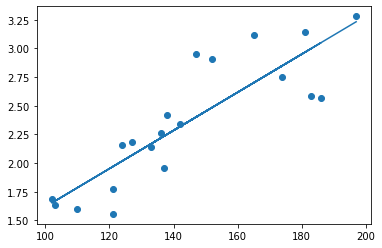

In [27]:
plt.plot(X,reg.predict(X))
plt.scatter(X,y)

#### x1 and x2

In [35]:
reg.intercept_

-0.04378714025862829

In [37]:
reg.coef_

array([0.01663447])

Here we can see that the formula of the line = y = -0.017*x + 0.043. So x1 = -0.017 and x2 = 0.043

##### Prediction size books with 180 pages and books with 2000 pages

In [29]:
reg.predict([[180]])

array([2.95041695])

In [30]:
reg.predict([[2000]])

array([33.22514725])

###### interpolation vs extrapolation

Thus our linear regression model predicts a book of 180 pages to be 2.95cm in height, and a book of 2000 pages to be 33.23cm in height. The prediction made at 180 pages is called interpolation, meaning the value of the datapoint is included in the train data set. The prediction made at 2000 pages is called extrapolation, meaning the value of the datapoint is bigger than the maximum value in the train data set. Data with more than 200 pages could show a different correlation which our model is not aware of. That means extrapolated predictions could be less acurate in this situation.